In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
df = sns.load_dataset("healthexp")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [ ]:
# https://matplotlib.org/3.1.0/api/markers_api.html

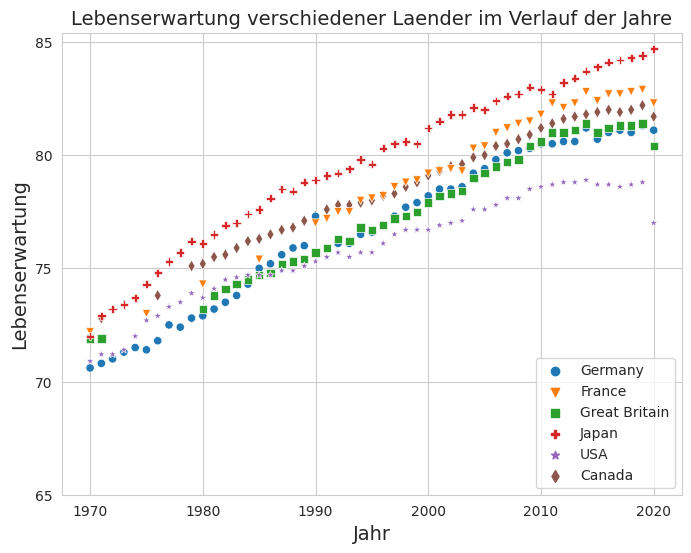

In [33]:
plt.figure(figsize=(8,6))
with sns.axes_style(style="whitegrid"):
    ax = sns.scatterplot(data=df, x="Year", 
                          y="Life_Expectancy", 
                          hue="Country", 
                          style="Country", 
                          markers = {"Germany":"o", 
                                     "France":"v", 
                                     "Great Britain":"s", 
                                     "Japan": "P", 
                                     "USA":"*", 
                                     "Canada":"d",})
    ax.set_xlabel("Jahr", fontsize=14)
    ax.set_ylabel("Lebenserwartung", fontsize=14)
    ax.set_title("Lebenserwartung verschiedener Laender im Verlauf der Jahre", fontsize=14)
    ax.set_yticks(range(65,90,5))
    ax.legend(loc='lower right')


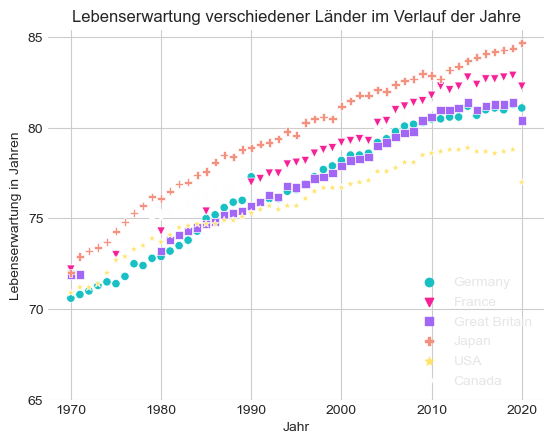

In [29]:
with sns.axes_style(style="whitegrid"):
    ax = sns.scatterplot(data=df, x="Year", y="Life_Expectancy", hue="Country", 
                         style="Country", 
                         markers={"Germany":"o", "France":"v", "Great Britain":"s", "Japan":"P", "USA":"*", "Canada":"d"})

ax.set(xlabel="Jahr", ylabel="Lebenserwartung in Jahren", 
       title="Lebenserwartung verschiedener Länder im Verlauf der Jahre",
       yticks=range(65,86,5))

ax.legend(loc='lower right');

***

In [14]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
titanic.dropna(inplace=True)
titanic["sex"] = titanic.sex.sort_values()

In [16]:
neu = titanic.dropna().groupby(["sex", "survived"]).size().reset_index()

In [24]:
neu.rename(columns={0 : "count"}, inplace=True)

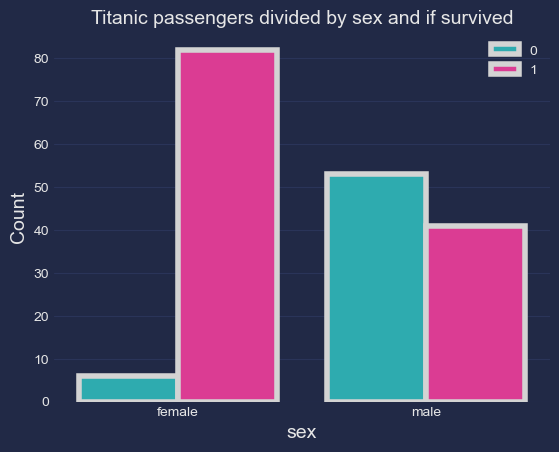

In [32]:
ax = sns.barplot(x="sex", y="count", hue="survived", data=neu, linewidth=4, edgecolor="lightgray")
ax.set_xlabel("sex", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Titanic passengers divided by sex and if survived", fontsize=14)
#ax.set_yticks(range(0,90,10))
ax.legend(loc='upper right')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22084\914047619.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="sex", y="fare", hue="survived", data=titanic, linewidth=4, edgecolor="lightgray", ci=None)


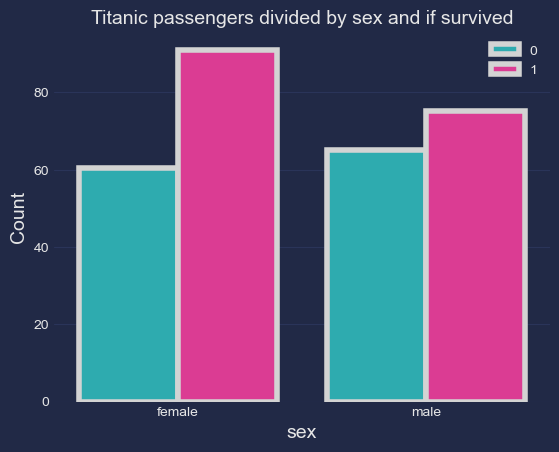

In [33]:
ax = sns.barplot(x="sex", y="fare", hue="survived", data=titanic, linewidth=4, edgecolor="lightgray", ci=None)
ax.set_xlabel("sex", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Titanic passengers divided by sex and if survived", fontsize=14)
#ax.set_yticks(range(0,90,10))
ax.legend(loc='upper right')
plt.show()

***

In [35]:
dj = sns.load_dataset("dowjones")
dj

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [40]:
dj["year"] = pd.DatetimeIndex(dj["Date"]).year
dj.year

0      1914
1      1915
2      1915
3      1915
4      1915
       ... 
644    1968
645    1968
646    1968
647    1968
648    1968
Name: year, Length: 649, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_22084\411363274.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="Date", y="Price", data=dj, ci=None, color="green")


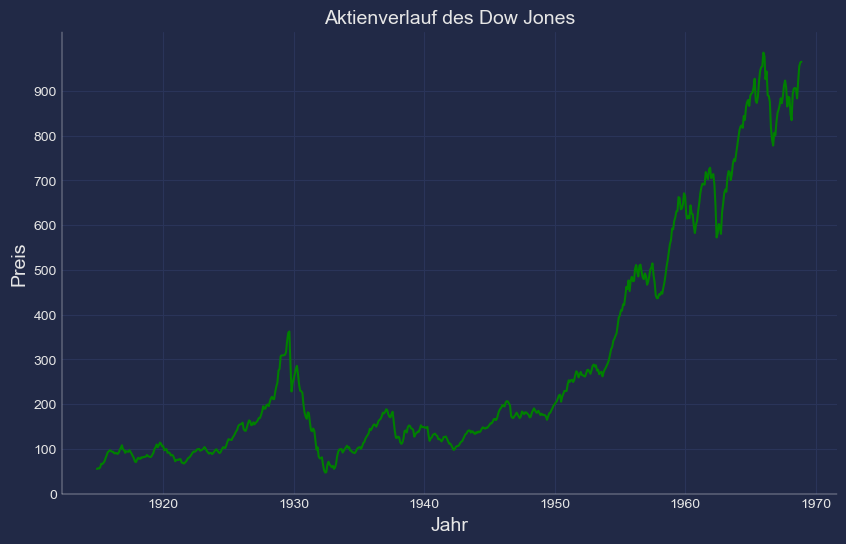

In [41]:
plt.figure(figsize=(10,6))
plt.style.use("https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle")
ax = sns.lineplot(x="Date", y="Price", data=dj, ci=None, color="green")

ax.grid(True)
ax.set_xlabel("Jahr", fontsize=14)
ax.set_ylabel("Preis", fontsize=14)
ax.set_title("Aktienverlauf des Dow Jones", fontsize=14)
ax.set_yticks(range(0,1000,100))
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

# grafiğin kenarlığını kaldır
sns.despine()
plt.show()


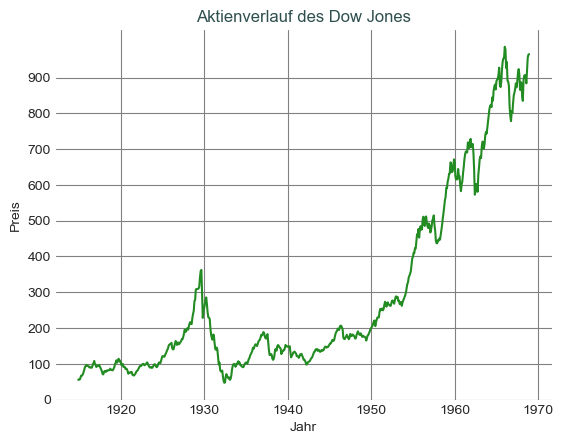

In [37]:
with sns.axes_style(style="whitegrid", rc={"grid.color":"gray", "text.color":"darkslategrey", "xtick.top":False}):
    ax = sns.lineplot(data=dj, x="Date", y="Price", color="forestgreen")

ax.set_title("Aktienverlauf des Dow Jones")
ax.set_xlabel("Jahr")
ax.set_ylabel("Preis")
ax.set_yticks(range(0,1000,100))
plt.show();

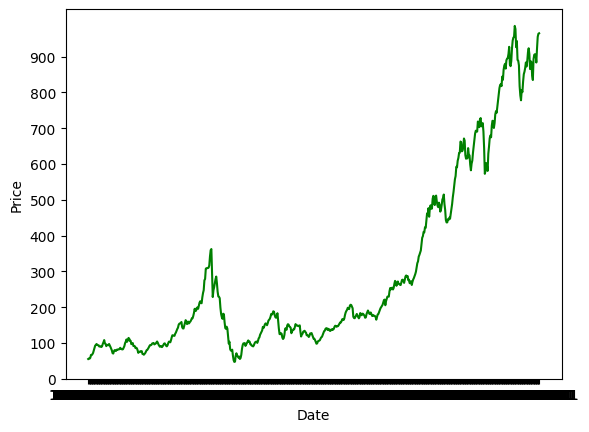

In [8]:
dj = sns.load_dataset("dowjones")
ax = sns.lineplot(data=dj, x="Date", y="Price", color="green", ci=None)

ax.set(yticks=range(0,1000, 100));

In [12]:
pip install seaborn --upgrade


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
sns.__version__

'0.12.2'

In [10]:
exercise = sns.load_dataset("exercise")

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


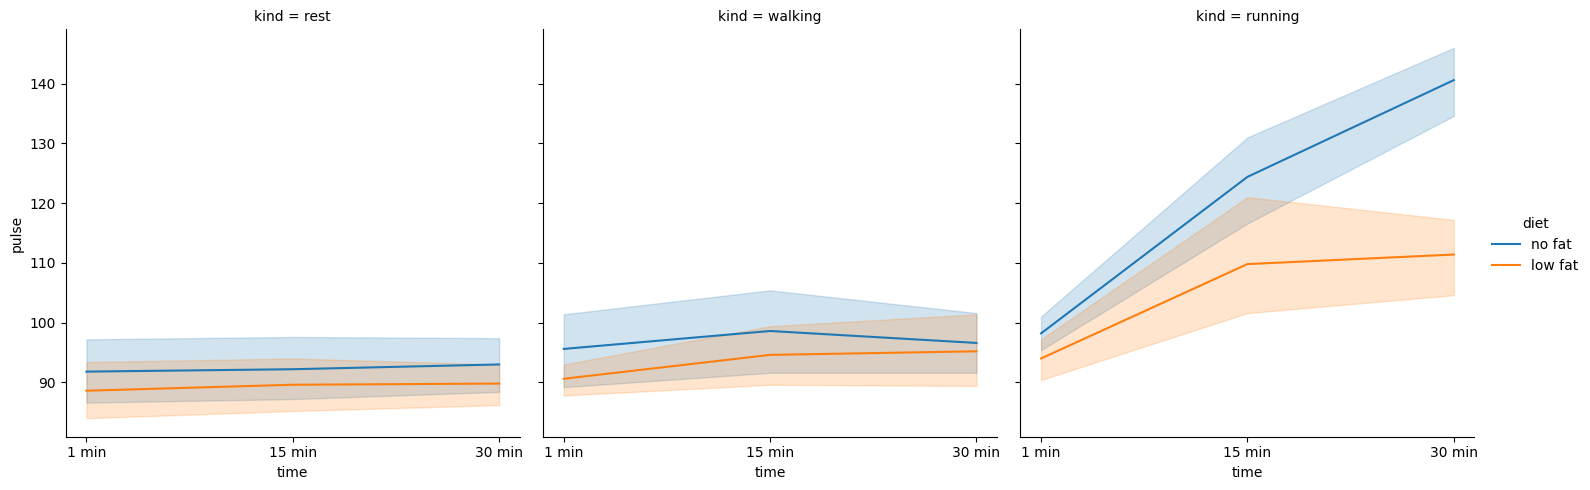

In [11]:
sns.relplot(
    data=exercise, x="time", y="pulse",
     hue="diet",
    col='kind',
    kind='line',
)
exercise=sns.load_dataset('exercise')
exercise

In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [38]:
sns.__version__

'0.12.2'

In [2]:
import pandas as pd
pd.__version__

'2.0.1'

In [43]:
pip install pandas --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.21.0 requires pandas<2,>=0.25, but you have pandas 2.0.1 which is incompatible.



  Using cached pandas-2.0.1-cp39-cp39-win_amd64.whl (10.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [4]:
pip install numpy --upgrade

     ---------------------------------------- 14.9/14.9 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
streamlit 1.21.0 requires pandas<2,>=0.25, but you have pandas 2.0.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [1]:
import numpy as np
np.__version__

c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'1.24.3'